In [1]:
# !pip install wordcloud

# 실습 1

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

f_name = './data/littleprince_djvu.txt'
with open(f_name) as f:   # utf - 8 또는 cp949 오류가 날때 >> with open(f_name, encoding = 'utf-8' 또는 'cp949' 추가)
    text = f.read() # 파일 내용 읽기

print(text[:100])
print(text[-100:])

THE LITTLE PRINCE 

Antoine De Saint-Exupery 

Antoine de Saint-Exupery, who was a French author, jo
ill know who he is. If this should happen, please comfort 
me. Send me word that he has come back. 



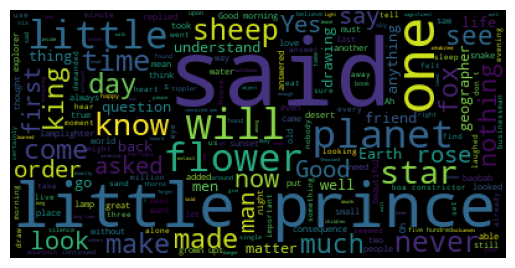

In [3]:
## 워드 클라우드의 이미지 생성

wc_img = WordCloud().generate(text)

# 생성 워드클라우드의 이미지를 화면에 표시
plt.imshow(wc_img)
plt.axis('off');

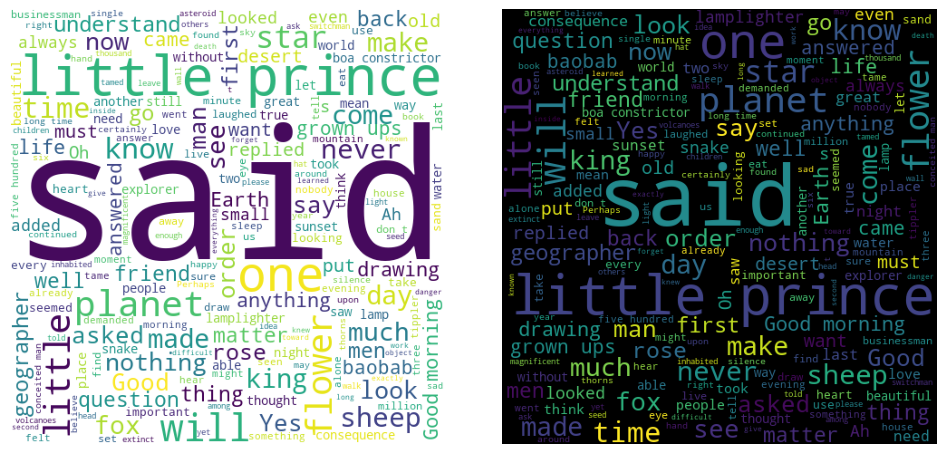

In [4]:
white_wordcloud = WordCloud(max_font_size = 300,
                        width=480, height=480,
                      background_color='white').generate(text)

black_wordcloud = WordCloud(width=480, height=480,
                      background_color='black').generate(text)


fig,ax = plt.subplots(1,2, figsize=(10,5))
fig.tight_layout();

ax[0].imshow(white_wordcloud)
ax[0].axis('off');

ax[1].imshow(black_wordcloud)
ax[1].axis('off');

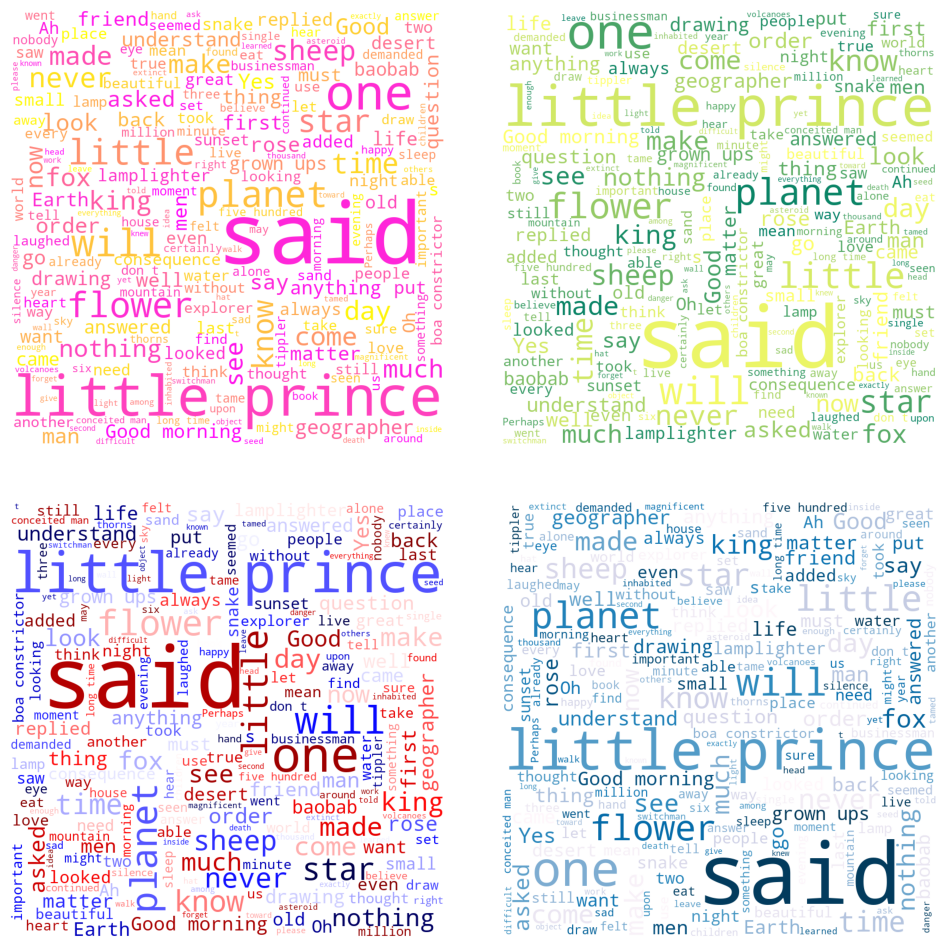

In [5]:
palettes = ['spring', 'summer', 'seismic','PuBu']
fig,ax = plt.subplots(2,2, figsize = (10,10))
fig.tight_layout()
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
# plt.subplots_adjust(wspace=0.1, 
#                     hspace=0.1)

for i in range(4):
    wordcloud = WordCloud(background_color = 'white',
                      width = 800, height=800,
                      colormap = palettes[i]).generate(text)
    axes[i].imshow(wordcloud)
    axes[i].axis('off')

# 실습 2

In [6]:
# Transformer pdf를 python으로 읽어오기
from pdfminer.high_level import extract_text

pdf_transformer = extract_text('./data/transformer.pdf')
print(pdf_transformer[:100], pdf_transformer[-100:])

Attention Is All You Need

Ashish Vaswani∗
Google Brain
avaswani@google.com

Noam Shazeer∗
Google Br els with
fast-forward connections for neural machine translation. CoRR, abs/1606.04199, 2016.

11




In [7]:
# 읽어온 텍스트를 Transforer.txt를 생성하여 넣어주기
f = open('Transformer.txt','w',encoding='utf-8')
f.write(pdf_transformer)

33021

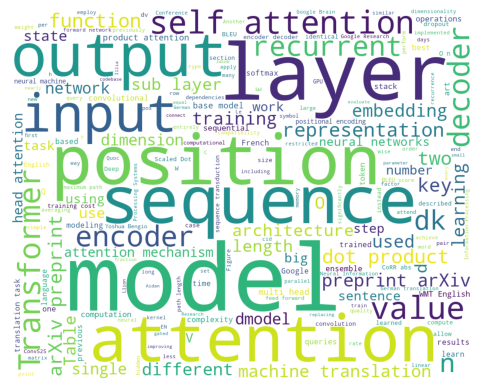

In [8]:
f_name = './data/Transformer.txt'
with open(f_name, encoding = 'utf-8') as f:   # utf - 8 또는 cp949 오류가 날때 >> with open(f_name, encoding = 'utf-8' 또는 'cp949' 추가)
    text = f.read() # 파일 내용 읽기


wc_img = WordCloud(background_color='white', width = 1000, height = 800,
                  max_font_size = 200).generate(text)

plt.imshow(wc_img)
plt.axis('off');

### 마스크 입히기

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

f_name = './data/Transformer.txt'
with open(f_name, encoding = 'utf-8') as f:   # utf - 8 또는 cp949 오류가 날때 >> with open(f_name, encoding = 'utf-8' 또는 'cp949' 추가)
    text = f.read()

In [11]:
# 불용어 : 자주 등장하지만, 의미없는 영어
print(STOPWORDS)

{'my', 'www', 'our', 'and', 'ours', 'during', 'down', 'he', 'very', 'does', "you'd", 'again', 'over', 'doing', "i've", "let's", 'for', 'then', 'i', 'how', 'has', "didn't", 'have', 'those', 'yourself', "haven't", 'am', 'that', 'at', 'who', 'your', 'what', "aren't", "hasn't", 'were', 'http', 'of', 'yours', 'nor', "they'll", 'like', 'up', "we'll", "shan't", 'there', 'few', "she'd", "you're", 'to', 'as', 'should', "she's", 'however', 'by', 'because', 'cannot', 'had', 'hers', 'ought', "we'd", 'are', 'we', 'below', 'while', 'it', 'ever', 'if', 'yourselves', "i'm", 'themselves', "shouldn't", 'through', 'him', "mustn't", 'between', "we're", 'after', 'theirs', 'this', "you've", "they're", 'me', 'under', "wasn't", 'why', "they'd", 'itself', 'being', "he'll", 'but', 'can', "he's", "hadn't", 'she', 'whom', 'out', 'r', 'in', 'also', 'above', 'most', "what's", 'since', 'the', "doesn't", 'just', 'an', "wouldn't", "i'd", "here's", 'than', 'com', "couldn't", 'them', 'was', 'would', "that's", 'both', 't

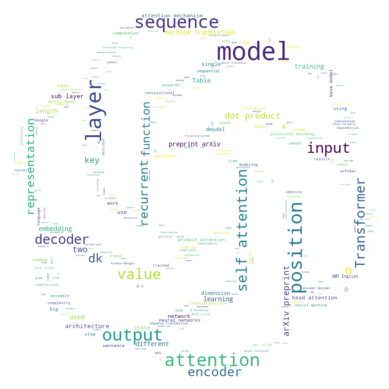

In [12]:
# word cloud 이미지 적용
stopwords = set(STOPWORDS)

mask = np.array(Image.open('./data/word_cloud_mask_img/openai.png'))
wc = WordCloud(stopwords = stopwords,
         background_color= 'white',
         max_words= 1000,
         mask = mask).generate(text)

plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()